<a href="https://colab.research.google.com/github/sudarshan-ramesh-02/Credit-Card-Fraud-Detection/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**


Importing Dependencies

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE
from sklearn.utils import resample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

import io

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

%matplotlib inline
plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Uploading and reading dataset

In [2]:
from google.colab import files
upload_file = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
data = pd.read_csv(io.BytesIO(upload_file['creditcard.csv']))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Exploratory Data Analysis for Visualizing and understanding the dataset better

Outliers in the data

In [4]:
print(data.shape)
print(data.describe())
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Genuine Cases: {}'.format(len(data[data['Class'] == 0])))

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

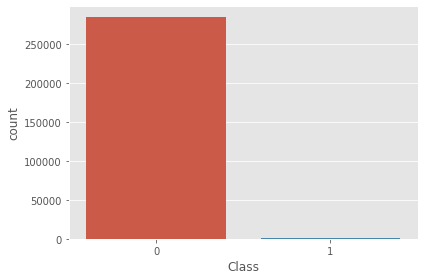

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.countplot(x = 'Class', data = data)
plt.tight_layout()

In [10]:
data['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [11]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Distribution Plots for studying patterns in Transaction times

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times - Complete Data')

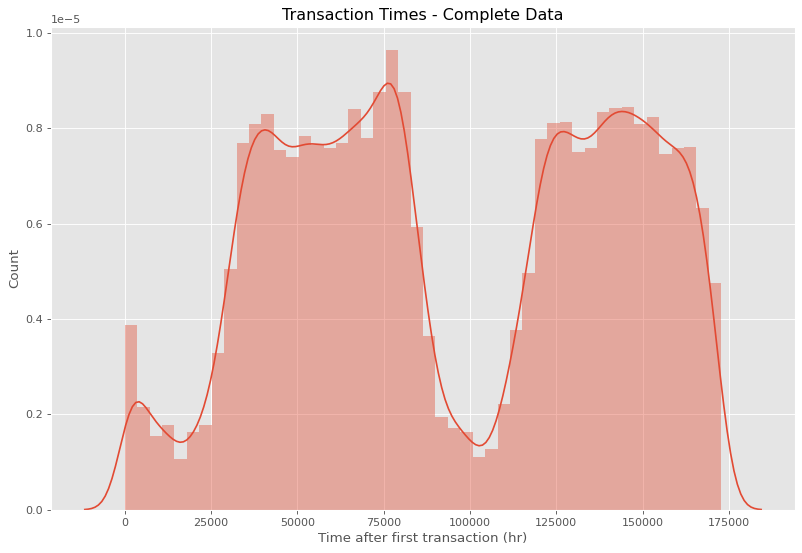

In [13]:
data_copy = pd.DataFrame(data)

plt.figure(figsize = (12,8), dpi = 80)
sns.distplot(data_copy['Time'], bins = 48)
plt.xlabel('Time after first transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times - Complete Data')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times - Valid transaction examples')

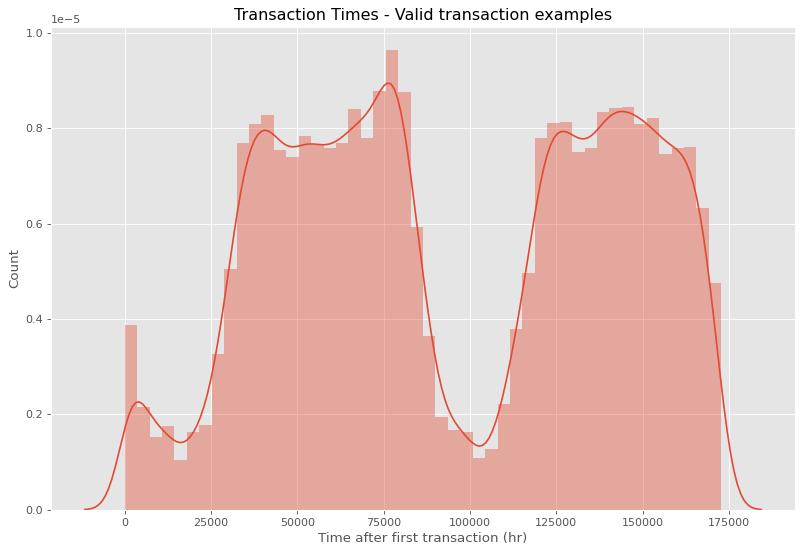

In [14]:
data_copy_nofraud = data_copy[data_copy['Class'] == 0]
plt.figure(figsize = (12,8), dpi = 80)
sns.distplot(data_copy_nofraud["Time"], bins = 48)
plt.xlabel('Time after first transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times - Valid transaction examples')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times - Fraud transaction examples')

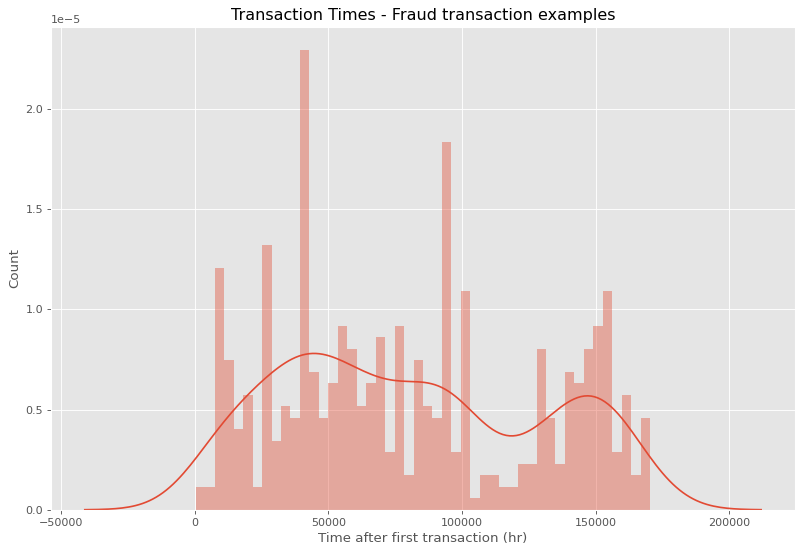

In [9]:
data_copy_fraud = data_copy[data_copy['Class'] == 1]
plt.figure(figsize = (12,8), dpi = 80)
sns.distplot(data_copy_fraud["Time"], bins = 48)
plt.xlabel('Time after first transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times - Fraud transaction examples')

Box Plot for studying patterns in Transaction amounts

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot for patterns in Transaction Amounts')

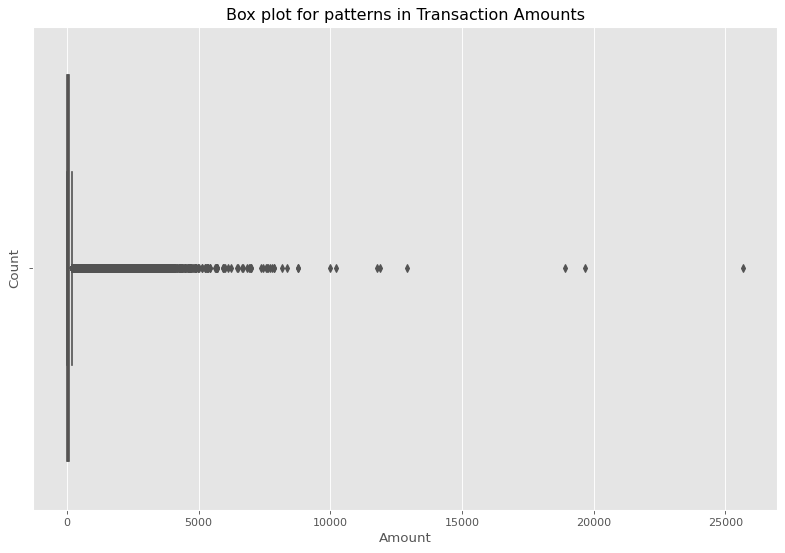

In [15]:
plt.figure(figsize = (12,8), dpi = 80)
sns.boxplot(data_copy["Amount"])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Box plot for patterns in Transaction Amounts')

TSNE plots in 2D and 3D to understand the imbalance better

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


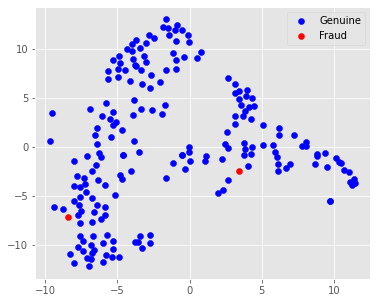

In [16]:
X_tsne = data.drop('Class', axis = 1)[280100:280300]
target = data['Class']
Y_tsne = target[280100:280300]

tsne2 = TSNE(n_components = 2, random_state = 0)
tsne3 = TSNE(n_components = 3, random_state = 0)

X_2D = tsne2.fit_transform(X_tsne)
target_ids = range(2)

plt.figure(figsize = (6,5))
colors = 'b', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, ['Genuine', 'Fraud']):
  plt.scatter(X_2D[Y_tsne == i, 0], X_2D[Y_tsne == i, 1], c = c, label = label)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


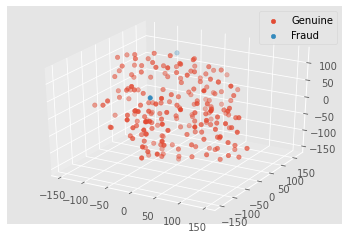

In [17]:
X_3D = tsne3.fit_transform(X_tsne)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
n = 200
target_ids = range(3)
colors = 'g', 'r', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, ['Genuine', 'Fraud']):
  ax.scatter(X_3D[Y_tsne == i, 0], X_3D[Y_tsne == i, 1], X_3D[Y_tsne == i, 2], label = label)
plt.legend()
plt.show()

Heatmap

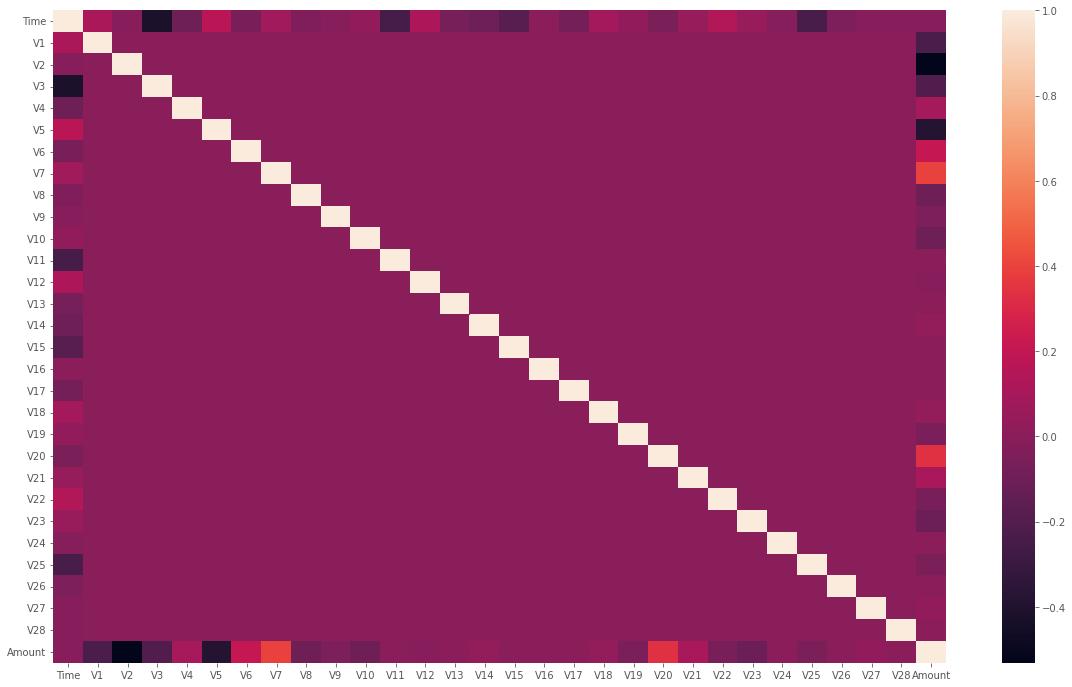

In [18]:
data_features = data.drop(columns = 'Class')
plt.figure(figsize = (20,12))
sns.heatmap(data_features.corr(), annot = False)
plt.show()

Data Manipulation and data splitting for training and testing

In [19]:
X = data.drop(['Class'], axis = 1)
Y = data['Class']

X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(X, Y, test_size = 0.25, random_state = 0)

df_train = X_train_df.join(Y_train_df)
df_test = X_test_df.join(Y_test_df)

X_train = X_train_df.values
Y_train = Y_train_df.values
X_test = X_test_df.values
Y_test = Y_test_df.values

Techniques for Imbalance Correction to be performed on training dataset

Up Sampling


In [20]:
not_fraud = df_train[df_train['Class'] == 0]
fraud = df_train[df_train['Class'] == 1]
fraud_upsampled = resample(fraud, replace = True, n_samples = len(not_fraud), random_state = 27)
upsampled = pd.concat([not_fraud, fraud_upsampled])

df_X_train_up = df_train.drop(['Class'], axis = 1)
X_train_up = df_X_train_up.values
df_Y_train_up = df_train['Class']
Y_train_up = df_Y_train_up.values

Down Sampling

In [21]:
not_fraud = df_train[df_train['Class'] == 0]
fraud = df_train[df_train['Class'] == 1]
not_fraud_downsampled = resample(not_fraud, replace = True, n_samples = len(fraud), random_state = 27)
downsampled = pd.concat([fraud, not_fraud_downsampled])

df_X_train_down = df_train.drop(['Class'], axis = 1)
X_train_down = df_X_train_down.values
df_Y_train_down = df_train['Class']
Y_train_down = df_Y_train_down.values

Implementing Random Forest Classifier model on the training dataset

Classifier model to be trained on 3 sets of data:


*   Base Unbalanced data
*   Up Sampled data
*   Down Sampled data

Performance of the model on these 3 datasets to be compared 





1) Base Unbalanced data

In [24]:
rfclf_base = RandomForestClassifier()
rfclf_base.fit(X_train, Y_train)
Y_predict_base = rfclf_base.predict(X_test)

Performance Metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.78      0.85       120

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score 0.999522485323446
Precision Score 0.93
Recall Score 0.775
F1 Score 0.8454545454545456


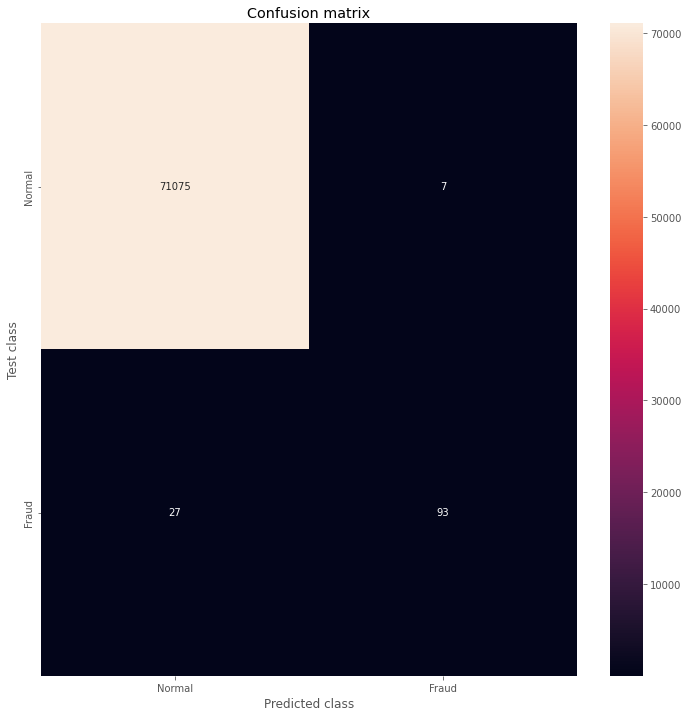

In [25]:
clf_report = classification_report(Y_test, Y_predict_base)
print(clf_report)

acc = accuracy_score(Y_test, Y_predict_base)
print('Accuracy Score {}'.format(acc))

prec = precision_score(Y_test, Y_predict_base)
print('Precision Score {}'.format(prec))

rec = recall_score(Y_test, Y_predict_base)
print('Recall Score {}'.format(rec))

f1 = f1_score(Y_test, Y_predict_base)
print('F1 Score {}'.format(f1))

Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict_base)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels = Labels, annot = True, fmt = 'd')
plt.title("Confusion matrix")
plt.ylabel('Test class')
plt.xlabel('Predicted class')
plt.show()

2) Up Sampled data

In [27]:
rfclf_up = RandomForestClassifier()
rfclf_up.fit(X_train_up, Y_train_up)
Y_predict_up = rfclf_up.predict(X_test)

Performance Metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.78      0.85       120

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score 0.9995365298727564
Precision Score 0.9306930693069307
Recall Score 0.7833333333333333
F1 Score 0.8506787330316742


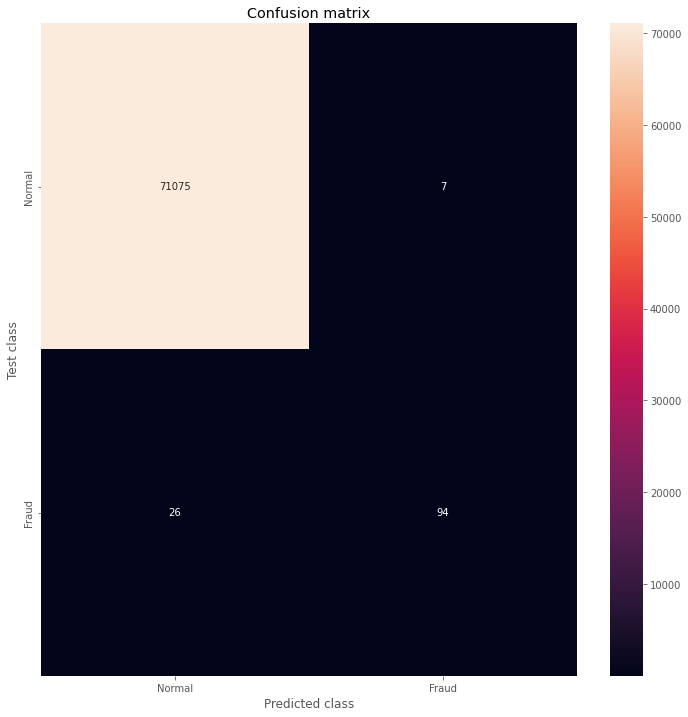

In [28]:
clf_report = classification_report(Y_test, Y_predict_up)
print(clf_report)

acc = accuracy_score(Y_test, Y_predict_up)
print('Accuracy Score {}'.format(acc))

prec = precision_score(Y_test, Y_predict_up)
print('Precision Score {}'.format(prec))

rec = recall_score(Y_test, Y_predict_up)
print('Recall Score {}'.format(rec))

f1 = f1_score(Y_test, Y_predict_up)
print('F1 Score {}'.format(f1))

Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict_up)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels = Labels, annot = True, fmt = 'd')
plt.title("Confusion matrix")
plt.ylabel('Test class')
plt.xlabel('Predicted class')
plt.show()

3) Down Sampled data

In [31]:
rfclf_down = RandomForestClassifier()
rfclf_down.fit(X_train_down, Y_train_down)
Y_predict_down = rfclf_down.predict(X_test)

Performance Metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.94      0.80      0.86       120

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score 0.9995786635206876
Precision Score 0.9411764705882353
Recall Score 0.8
F1 Score 0.8648648648648648


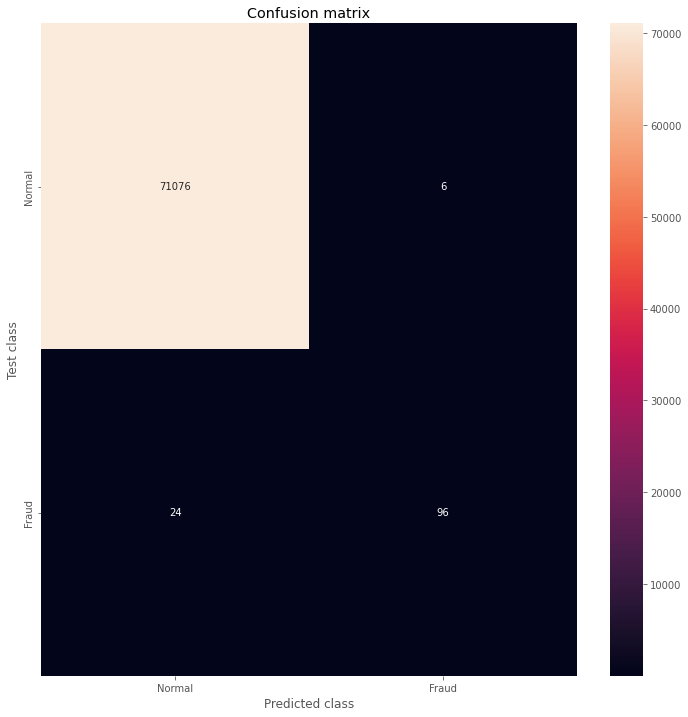

In [32]:
clf_report = classification_report(Y_test, Y_predict_down)
print(clf_report)

acc = accuracy_score(Y_test, Y_predict_down)
print('Accuracy Score {}'.format(acc))

prec = precision_score(Y_test, Y_predict_down)
print('Precision Score {}'.format(prec))

rec = recall_score(Y_test, Y_predict_down)
print('Recall Score {}'.format(rec))

f1 = f1_score(Y_test, Y_predict_down)
print('F1 Score {}'.format(f1))

Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict_down)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels = Labels, annot = True, fmt = 'd')
plt.title("Confusion matrix")
plt.ylabel('Test class')
plt.xlabel('Predicted class')
plt.show()